In [1]:
from libraries.ewt_transform import EWT1D 
from libraries.helpers import findFibrets
import numpy as np 
import yfinance as yf 
import matplotlib.pyplot as plt 
import pandas as pd 

import plotly.offline as py
py.init_notebook_mode(connected=True)

import plotly.graph_objects as go 

In [2]:
data = yf.download("SPY", "2015-01-01", "2020-01-01")
fig = go.Figure(data = [
        go.Candlestick(x = data.index, 
        open = data["Open"], high = data["High"],
        low = data["Low"], close = data["Close"])
    ])

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

[*********************100%***********************]  1 of 1 completed


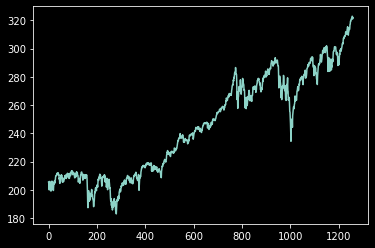

In [3]:
close = list(data["Close"])
plt.plot(close)

In [35]:
def getLowFreqComponent(window, order, n=6):
    window = np.asarray(window)
    ewt = EWT1D(window, n)[0].T
    lowFreq = np.zeros_like(window)
    for o in range(order):
        lowFreq += ewt[o]
    return lowFreq    

rets = []
best = []
windows = []
for start in range(len(close)//30):
    window = getLowFreqComponent(close[start*30 : (start+1)*30], order=2)
    windows.append(window)
    ret, b = findFibrets(window)
    rets.append(ret)
    best.append(b)
# rets, best = findFibrets(window)
# print(rets)

In [36]:
def plotFibrets(idx, r = rets, b = best):
    
    rets_ = r[idx]
    best_ = b[idx]
    window = windows[idx]
    plt.figure(figsize=(10, 6))
    plt.plot(window, label="Local window", color="red")
    for idx, r_ in enumerate(rets_):
        if idx == 0:
            plt.axhline(r_, label="Retracement", color="white")
        else:
            plt.axhline(r_, color="white")
    plt.plot(best_, [window[best_[0]], window[best_[1]]], label="Best Trend", color="blue")
    plt.legend(fontsize=14)
    plt.show()

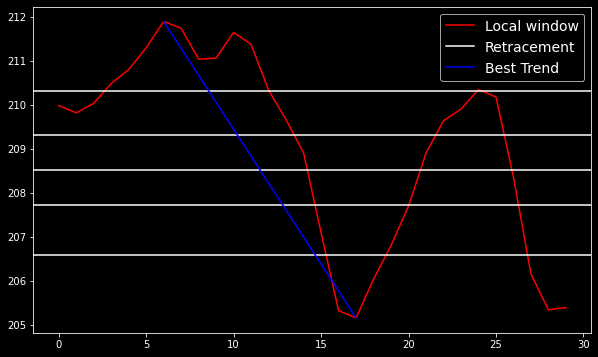

In [37]:
plotFibrets(1)

In [8]:
rets[0]

[206.583599609375,
 205.13820050048827,
 203.97000122070312,
 202.80180194091798,
 201.13860296630858]